# Introduction
This week we will look at some unsupervised clustering algorithms. In this worksheet, we will start off by implementing $k$-means from scratch. We go on to look at using elbow plots to select a good value of $k$.

We go on to complare the behaviour of k-means with hierarchical clustering and Gaussian mixture models.

NB: if you find implementing the $k$-means algorithm form scratch challenging, **don't worry**! Have a go, but the rest of the worksheet is not dependent on doing this, so you can skip that question and come back to it when you finish the rest of the worksheet.

# K-means clustering
In the lecture, we saw that k-means is an unsupervised clustering algorithm. Recall that the algorithm runs as follows:

Given a set of datapoints drawn from $\Omega=\mathbb{R}^n$:

1. Randomly partition the set of datapoints into $k$ sets.
2. For each set $P$ calculate its mean vector:
$$
\hat{x}_P=\left( \frac{\sum_{\vec{x} \in P} x_1}{|P|}, \ldots,\frac{\sum_{\vec{x} \in P} x_i}{|P|} \ldots, \frac{\sum_{\vec{x} \in P} x_n}{|P|}  \right)
$$
3. For each datapoint evaluate the squared Euclidean distance from each of the mean vectors e.g. $||\vec{x}-\hat{x}_P ||^2$. Reallocate the datapoint to the partition set the mean of which it is closest to.
4. If the partition sets remain unchanged then stop.  Else go to 2.


## Implementing $k$-means

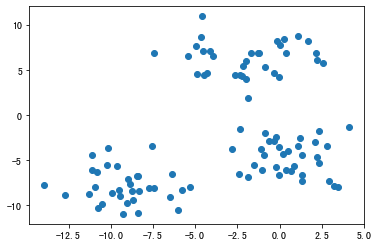

In [126]:
# The following code creates some artificial data and plots it
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

X, y, centres_blob = make_blobs(centers=3,n_samples=100, cluster_std=2, random_state=100, return_centers=True);
fig, ax = plt.subplots();
ax.scatter(X[:,0], X[:,1]);

In [127]:
from numpy.random import RandomState;

In [128]:
rs = RandomState(10);
labels = rs.randint(0, 3, 100);

In [129]:
centroids = np.empty([3, X.shape[1]]);
for i in range(3):
    x = X[labels == i];
    centroids[i] = np.mean(x, axis=0);

Implement a function `kmeans` that takes a value $k$ and the data $X$, clusters the data, and returns the centroids and the labels of the data

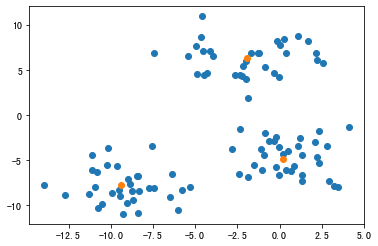

In [130]:
def kmeans(k, X):
    # randomly assign labels to the data
    ##TODO##
    # rs = RandomState(100);
    # labels = rs.randint(0, 3, 100);
    labels = np.array([i%k for i in range(X.shape[0])]);


    labels_new = np.copy(labels);
    centres = np.empty([3, X.shape[1]])
    
    # set up a while loop that will run until the data labels no longer change
    while True:
        # Calculate the centroids of the data
        ##TODO##
        for i in range(k):
            x = X[labels == i];
            centres[i] = np.mean(x, axis=0);
        
        # For each datapoint:
        for i, x in enumerate(X):
            #Calculate the squared Euclidean distance to each centroid
            ##TODO##
            distances = np.sqrt(np.sum(np.square(x - centres), axis=1));
                     
            # Assign new labels based on distance to the centroid
            ##TODO##
            labels_new[i] = np.where(distances == np.min(distances))[0][0];
            
        # If all the new labels are equal to the old labels, 
        # break out of the while loop
        ##TODO##
        if np.all(labels == labels_new):
            break;
        
        # Assign the values of the new labels to the variable labels
        ##TODO##
        labels = labels_new;
        
    # return the centres and the labels.
    return centres, labels

# Plot the centroids on the data. Are they as you would expect?
centres, labels = kmeans(3, X)
ax.scatter(centres[:,0],centres[:,1])
fig

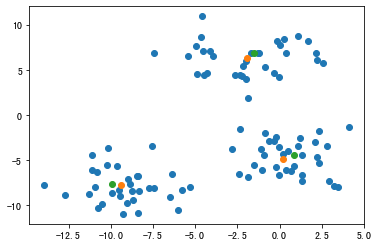

In [131]:
# Oringinal centroids
ax.scatter(centres_blob[:,0],centres_blob[:,1])
fig

## Using the $k$-means function from scikit-learn
Scikit-learn has $k$-means built in. We import it using the command `from sklearn.cluster import KMeans`. Look at the documentation for KMeans (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#). The KMeans estimator has 4 attributes. What are they?

The attributes are:  
1. Coordinates of cluster centers.  
2. Labels of each point.  
3. Sum of squared distances of samples to their closest cluster center,
weighted by the sample weights if provided.  
4. Number of iterations run.  

Which attribute would you use if you wanted to look at the labels assigned to the datapoints? What if you wanted to look at the centroids? What would you use the attribute `inertia_` for?

### Generating elbow plots
We will run $k$ means over our toy dataset for multiple values of $k$ and generate an elbow plot. To do this we can use the attribute `inertia_`. This attribute measures the within-cluster sum of squares, or the variance of each cluster, and the $k$ means algorithm works to minimize this quantity. The within-cluster sum of squares is defined as:
$$\sum_{j=1}^k\sum_{x \in P_j}||x - \mu_j||^2$$
To generate the elbow plot, we run $k$ means for values of $k$ from 1 to 10, and plot the inertia at each point. If there is a clear 'elbow' in the plot, then this gives us the optimal value of $k$. Do you see a clear 'elbow' in the plot? If so, what is the optimal value of $k$?
    

In [164]:
from sklearn.cluster import KMeans;

Text(0.5, 1.0, 'The elbow method showing the optimal k')

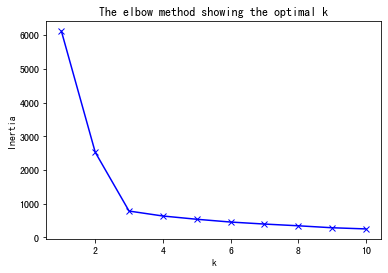

In [163]:
# Import KMeans from sklearn.cluster
##TODO##
from sklearn.cluster import KMeans;

# Optional: write your own function to calculate the inertia 
# (otherwise you can just use the attribute inertia_)
def inertia(X, labels, centroids):
    ##TODO## (Optional)
    inertia = [0] * centroids.shape[0];
    for i, mu in enumerate(centroids):
        x = X[labels == i];
        inertia[i] = np.sum(np.square(x-mu));
    return np.sum(inertia);
        
# Set up a variable to store the inertias
inertias = [];
K = 10;

# Loop over values of k from 1 to 10
for k in range(1, K+1):
    # Instantiate the KMeans class with k clusters
    ##TODO##
    kmeans = KMeans(k, random_state=10).fit(X);
    
    # Fit the model to the data
    ##TODO##
    res = kmeans.fit(X);
    
    # Store the value of the inertia for this value of k
    ##TODO##
    # inertias.append(res.inertia_);
    inertias.append(inertia(X, res.labels_, res.cluster_centers_));

# Plot the elbow
plt.figure()
plt.plot(range(1, K+1), inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The elbow method showing the optimal k')

# Clustering the iris dataset
The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in 1936. The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). There are four features corresponding to the length and the width of the sepals and petals, in centimetres. Typically, the Iris data set is used as a classification problem, but by considering only the 4-D input feature space we can also apply clustering algorithms to it.

In [203]:
# Import the iris dataset, and save the data into a variable X 
# (take a look at the documentation here: 
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)
##TODO##
from sklearn.datasets import load_iris;
data = load_iris();
X = data.data;

Let's begin by assuming that since there are 3 types of iris, then there may be 3 clusters. Instantiate a $k$-means classifier with 3 clusters, and fit it to the data. Print out the centroids. You can visualise the resulting clusters by generating scatter plots projected on 2 dimensions. Try generating scatter plots for various combinations of features.

**Extra question** Generate one large plot with subplots for each combination of features.

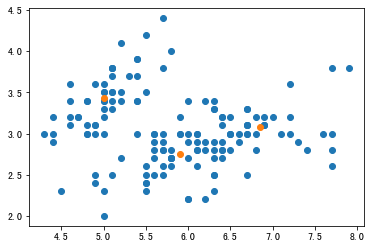

In [204]:
# Fit the iris dataset
##TODO##
kmeans = KMeans(3, random_state=10);
res_iris = kmeans.fit(X);
centroids = res_iris.cluster_centers_;

# Make a scatter plot of the data on the first two axes
# Experiment with looking at different axes
##TODO##
fig, ax = plt.subplots();
ax.scatter(X[:,0], X[:,1]);
ax.scatter(centroids[:,0], centroids[:,1])

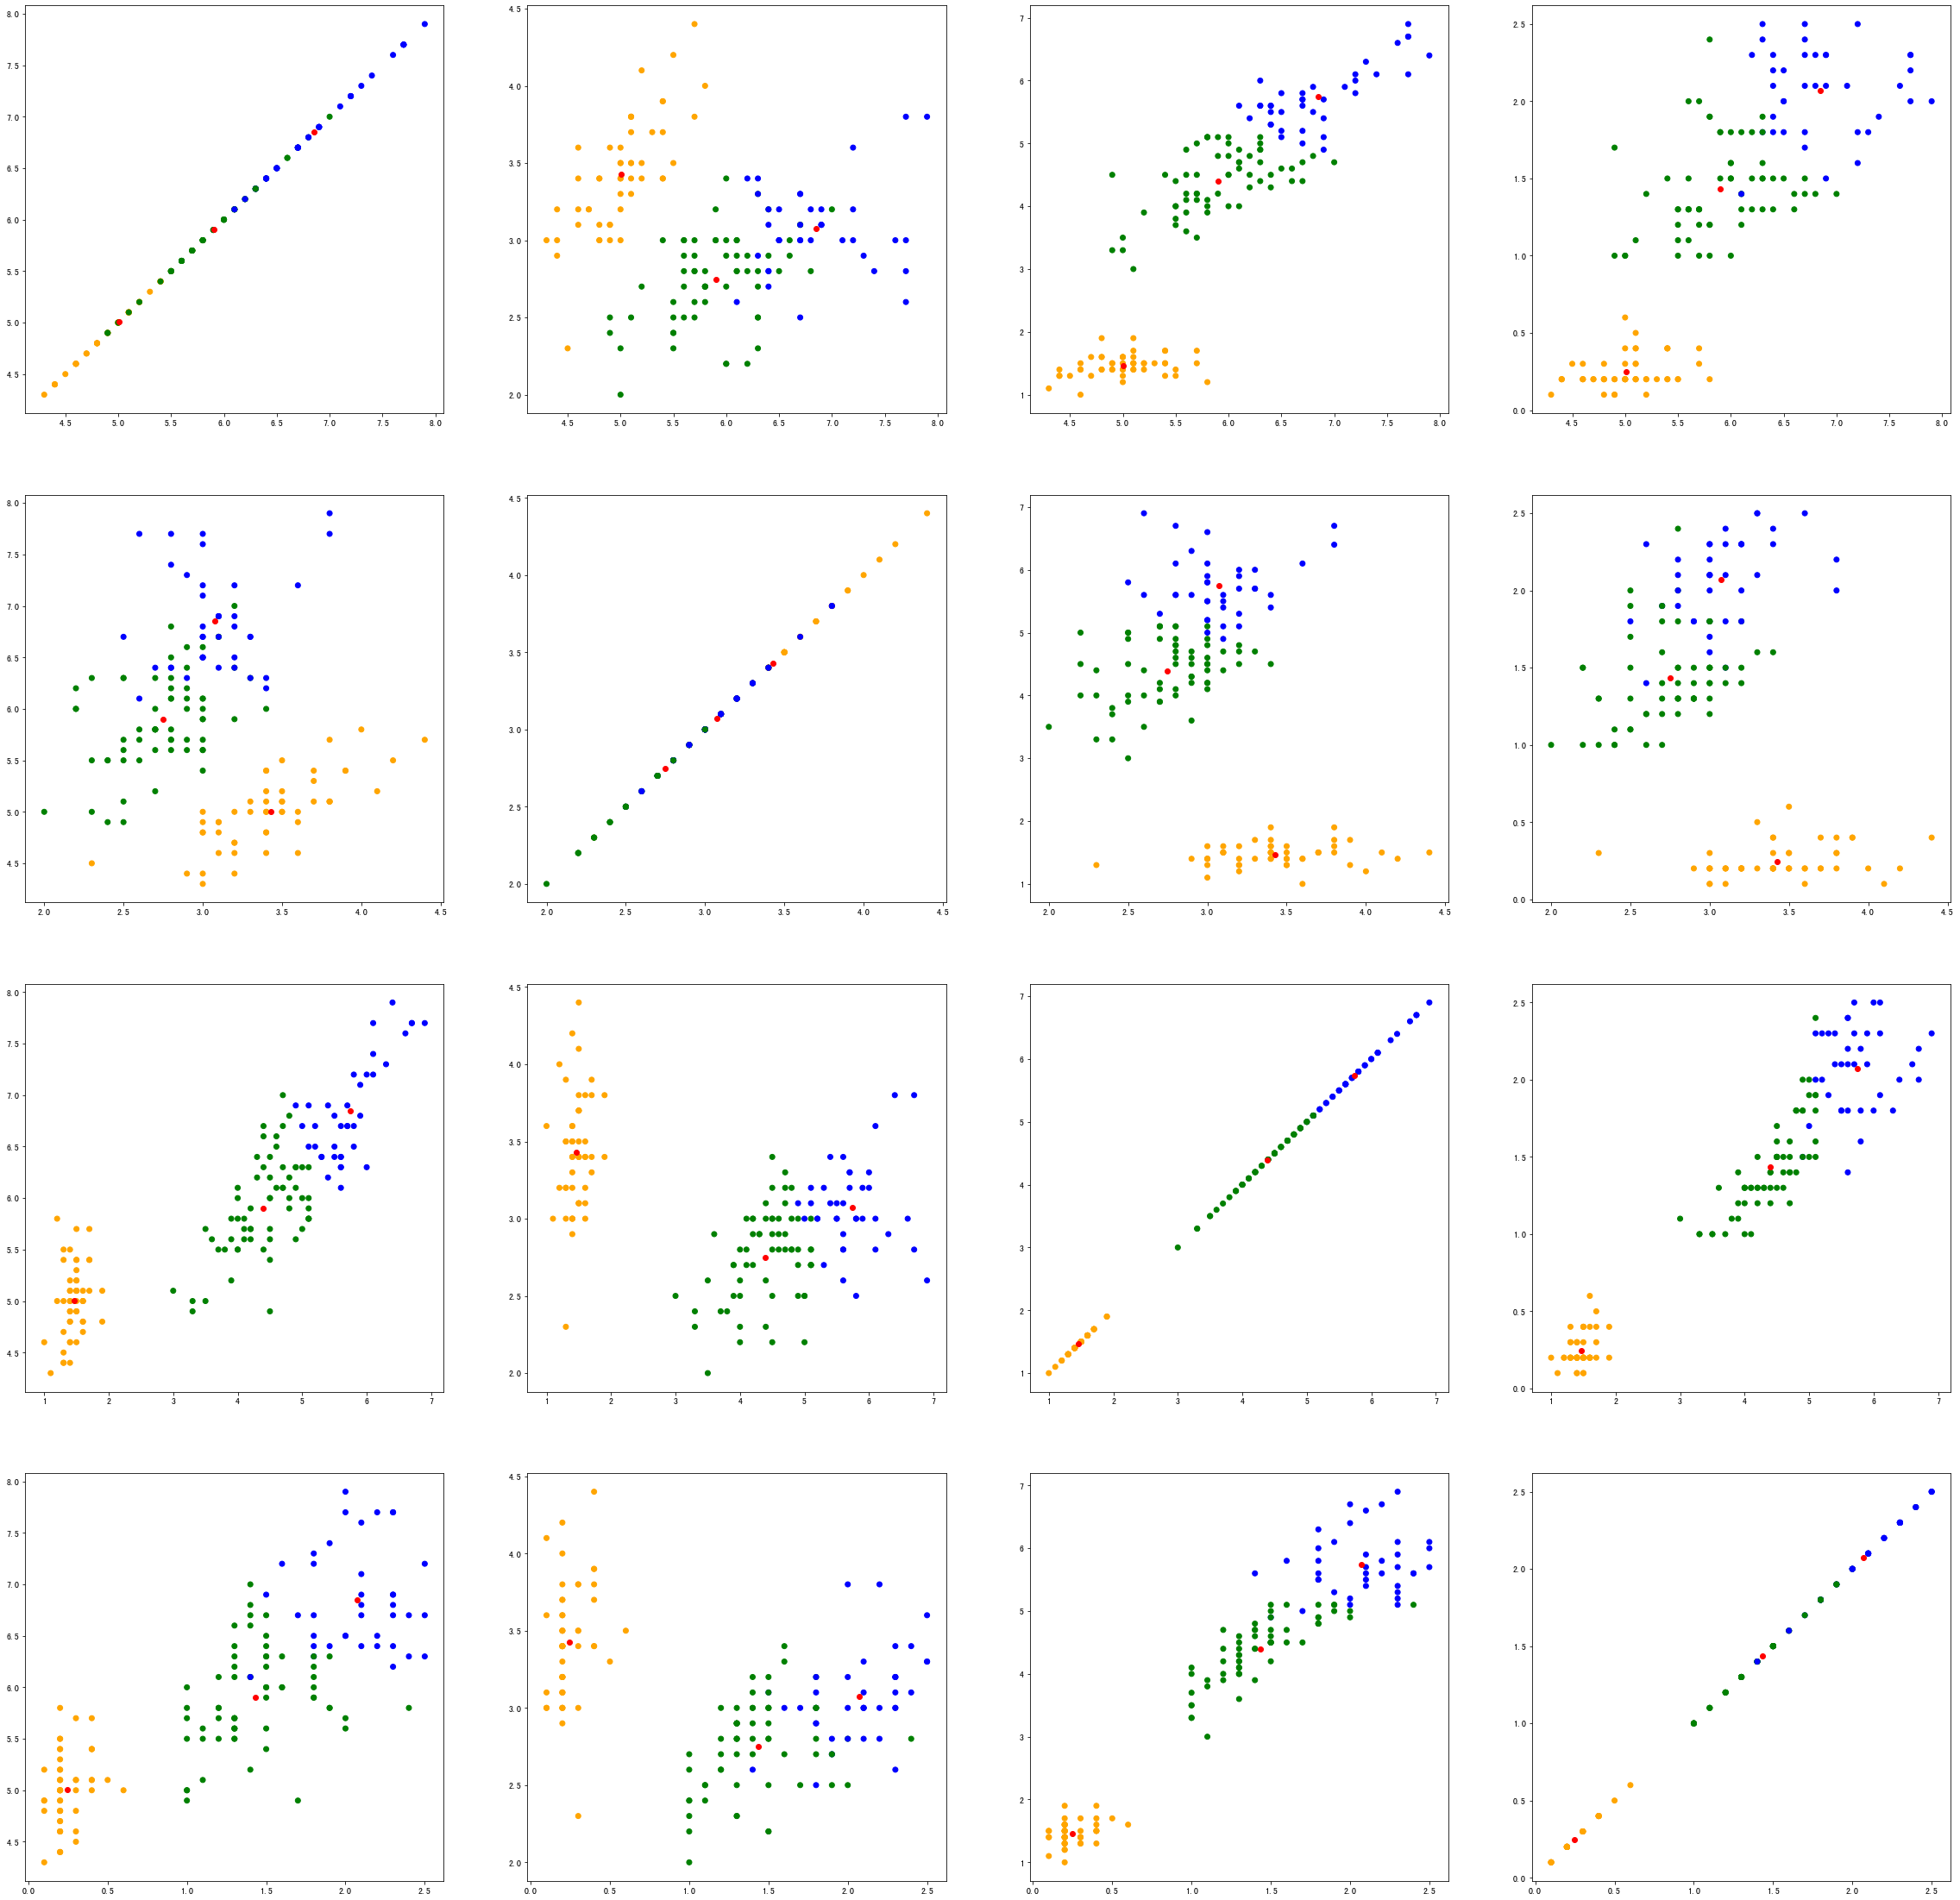

In [212]:
# Optional: Plot all combinations of data in one large plot with subplots for each combination of features
##TODO##
fig, axes = plt.subplots(4, 4, figsize=(40,40));
n = X.shape[1];
index = 0;

color_map = ['orange', 'green', 'blue'];
colors = [color_map[i] for i in res_iris.labels_];

for i in range(n):
    for j in range(0, n):
        axes[index//4, index%4].scatter(X[:, i], X[:, j], c=colors);
        axes[index//4, index%4].scatter(centroids[:,i], centroids[:,j], c="red");
        index += 1;

Generate an elbow plot for this data set. To what extent does this elbow plot support the assumption that there are three clusters present in the data?

Text(0.5, 1.0, 'The elbow method showing the optimal k')

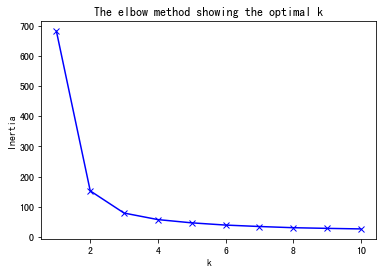

In [213]:
# Generate an elbow plot for this dataset
##TODO##
inertias = [];
K = 10;

# Loop over values of k from 1 to 10
for k in range(1, K+1):
    # Instantiate the KMeans class with k clusters
    ##TODO##
    kmeans = KMeans(k, random_state=10).fit(X);
    # Fit the model to the data
    ##TODO##
    res = kmeans.fit(X);
    # Store the value of the inertia for this value of k
    ##TODO##
    # inertias.append(res.inertia_);
    inertias.append(inertia(X, res.labels_, res.cluster_centers_));
    
# Plot the elbow
##TODO##
plt.figure()
plt.plot(range(1, K+1), inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The elbow method showing the optimal k')

# Hierarchical clustering
In this question we investigate the use of hierarchical clustering on the Iris data set. SciPy (pronounced 'Sigh Pie') is a Python-based ecosystem of open-source software for mathematics, science, and engineering. We start by importing packages `dendrogram` and `linkage`.



In [214]:
from scipy.cluster.hierarchy import dendrogram, linkage;

The following will generate a dendogram for the iris data set:

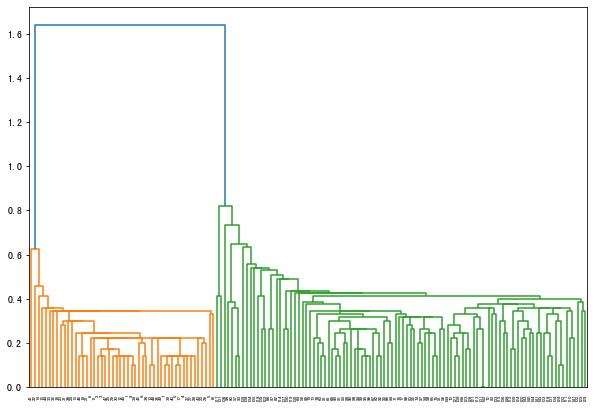

In [215]:
linked = linkage(X, 'single')
labelList = range(len(X))
plt.figure(figsize=(10, 7))
dendrogram(linked,labels=labelList)
plt.show()

Recall from the lectures that there are a number of ways of measuring the distance between clusters. For example:
* Minimum distance: $d(S,T) = \min\{d(x,y) : x \in S,y \in T\} $
* Average distance: $d(S,T) = \frac{1}{|S||T|} \sum_{(x, y)} d(x, y)$
* Maximum distance: $d(S,T) = \max\{d(x,y) : x \in S,y \in T\} $
* Centroid distance: $ d(S,T) = d(\frac{\sum_{x\in S} x}{|S|} \frac{\sum_{y\in T} y}{|T|})$

The parameter `'single'` in linkage refers to minimum distance. This can be change to `'average'` for average distance, `'complete'` for maximum distance and `'centroid'` for centroid distance. Generate the dendogram for each of these cases. Comment on which metrics are most consistent with the assumption of 3 clusters in the iris data set.

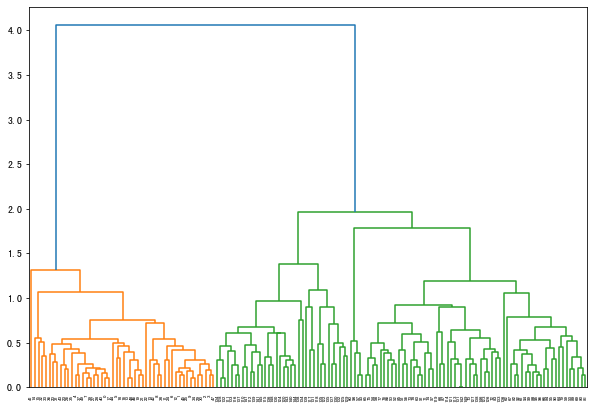

In [216]:
# Generate dendrograms for each distance metric
##TODO##
linked = linkage(X, 'average')
labelList = range(len(X))
plt.figure(figsize=(10, 7))
dendrogram(linked,labels=labelList)
plt.show()

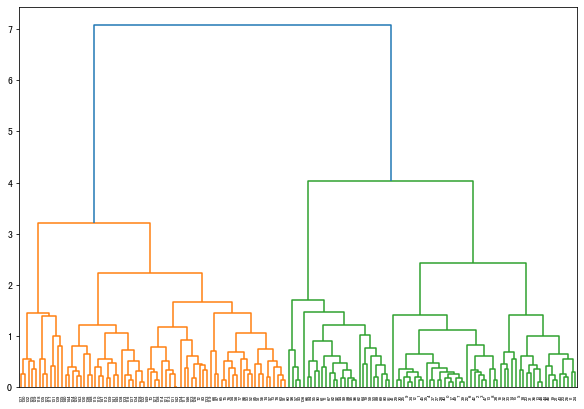

In [217]:
linked = linkage(X, 'complete')
labelList = range(len(X))
plt.figure(figsize=(10, 7))
dendrogram(linked,labels=labelList)
plt.show()

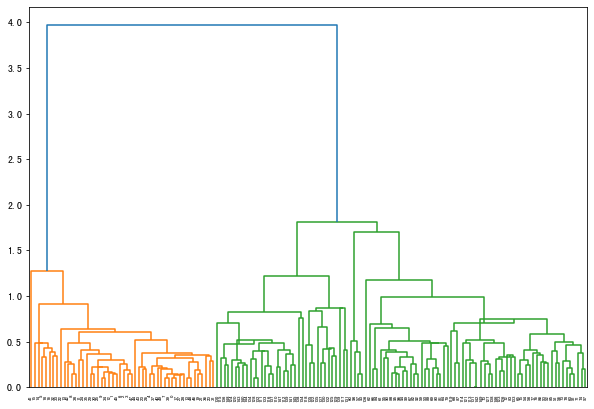

In [218]:
linked = linkage(X, 'centroid')
labelList = range(len(X))
plt.figure(figsize=(10, 7))
dendrogram(linked,labels=labelList)
plt.show()

The metrics most consistent with the assumption of 3 clusters are:

# Gaussian Mixture models
In this question we investigate the use of Gaussian clustering on the Iris data set.

In [219]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=3)
gmm.fit(X)

GaussianMixture(n_components=3)

We can extract the parameters for the learnt Gaussian distributions as follows:

In [220]:
print(gmm.means_)
print(gmm.covariances_)

[[6.54639415 2.94946365 5.48364578 1.98726565]
 [5.006      3.428      1.462      0.246     ]
 [5.9170732  2.77804839 4.20540364 1.29848217]]
[[[0.38744093 0.09223276 0.30244302 0.06087397]
  [0.09223276 0.11040914 0.08385112 0.05574334]
  [0.30244302 0.08385112 0.32589574 0.07276776]
  [0.06087397 0.05574334 0.07276776 0.08484505]]

 [[0.121765   0.097232   0.016028   0.010124  ]
  [0.097232   0.140817   0.011464   0.009112  ]
  [0.016028   0.011464   0.029557   0.005948  ]
  [0.010124   0.009112   0.005948   0.010885  ]]

 [[0.2755171  0.09662295 0.18547072 0.05478901]
  [0.09662295 0.09255152 0.09103431 0.04299899]
  [0.18547072 0.09103431 0.20235849 0.06171383]
  [0.05478901 0.04299899 0.06171383 0.03233775]]]


How do the means for the three distributions compare with the centroids from a 3-cluster $k$-means on this dataset?

In [222]:
# Compare the means from the GMM clusters with the means from 
# the k-means clusters
##TODO##
gmm.means_, centroids

(array([[6.54639415, 2.94946365, 5.48364578, 1.98726565],
        [5.006     , 3.428     , 1.462     , 0.246     ],
        [5.9170732 , 2.77804839, 4.20540364, 1.29848217]]),
 array([[5.006     , 3.428     , 1.462     , 0.246     ],
        [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
        [6.85      , 3.07368421, 5.74210526, 2.07105263]]))

Use the command `print(gmm.weights_)` to look at the weights for each distribution. What do these weights tell us about the composition of the three clusters?

In [223]:
##TODO##
print(gmm.weights_)

[0.36539575 0.33333333 0.30127092]


The weights shows these three clusters are almost even.

Generate scatter plots for different 2-D combinations of the features.

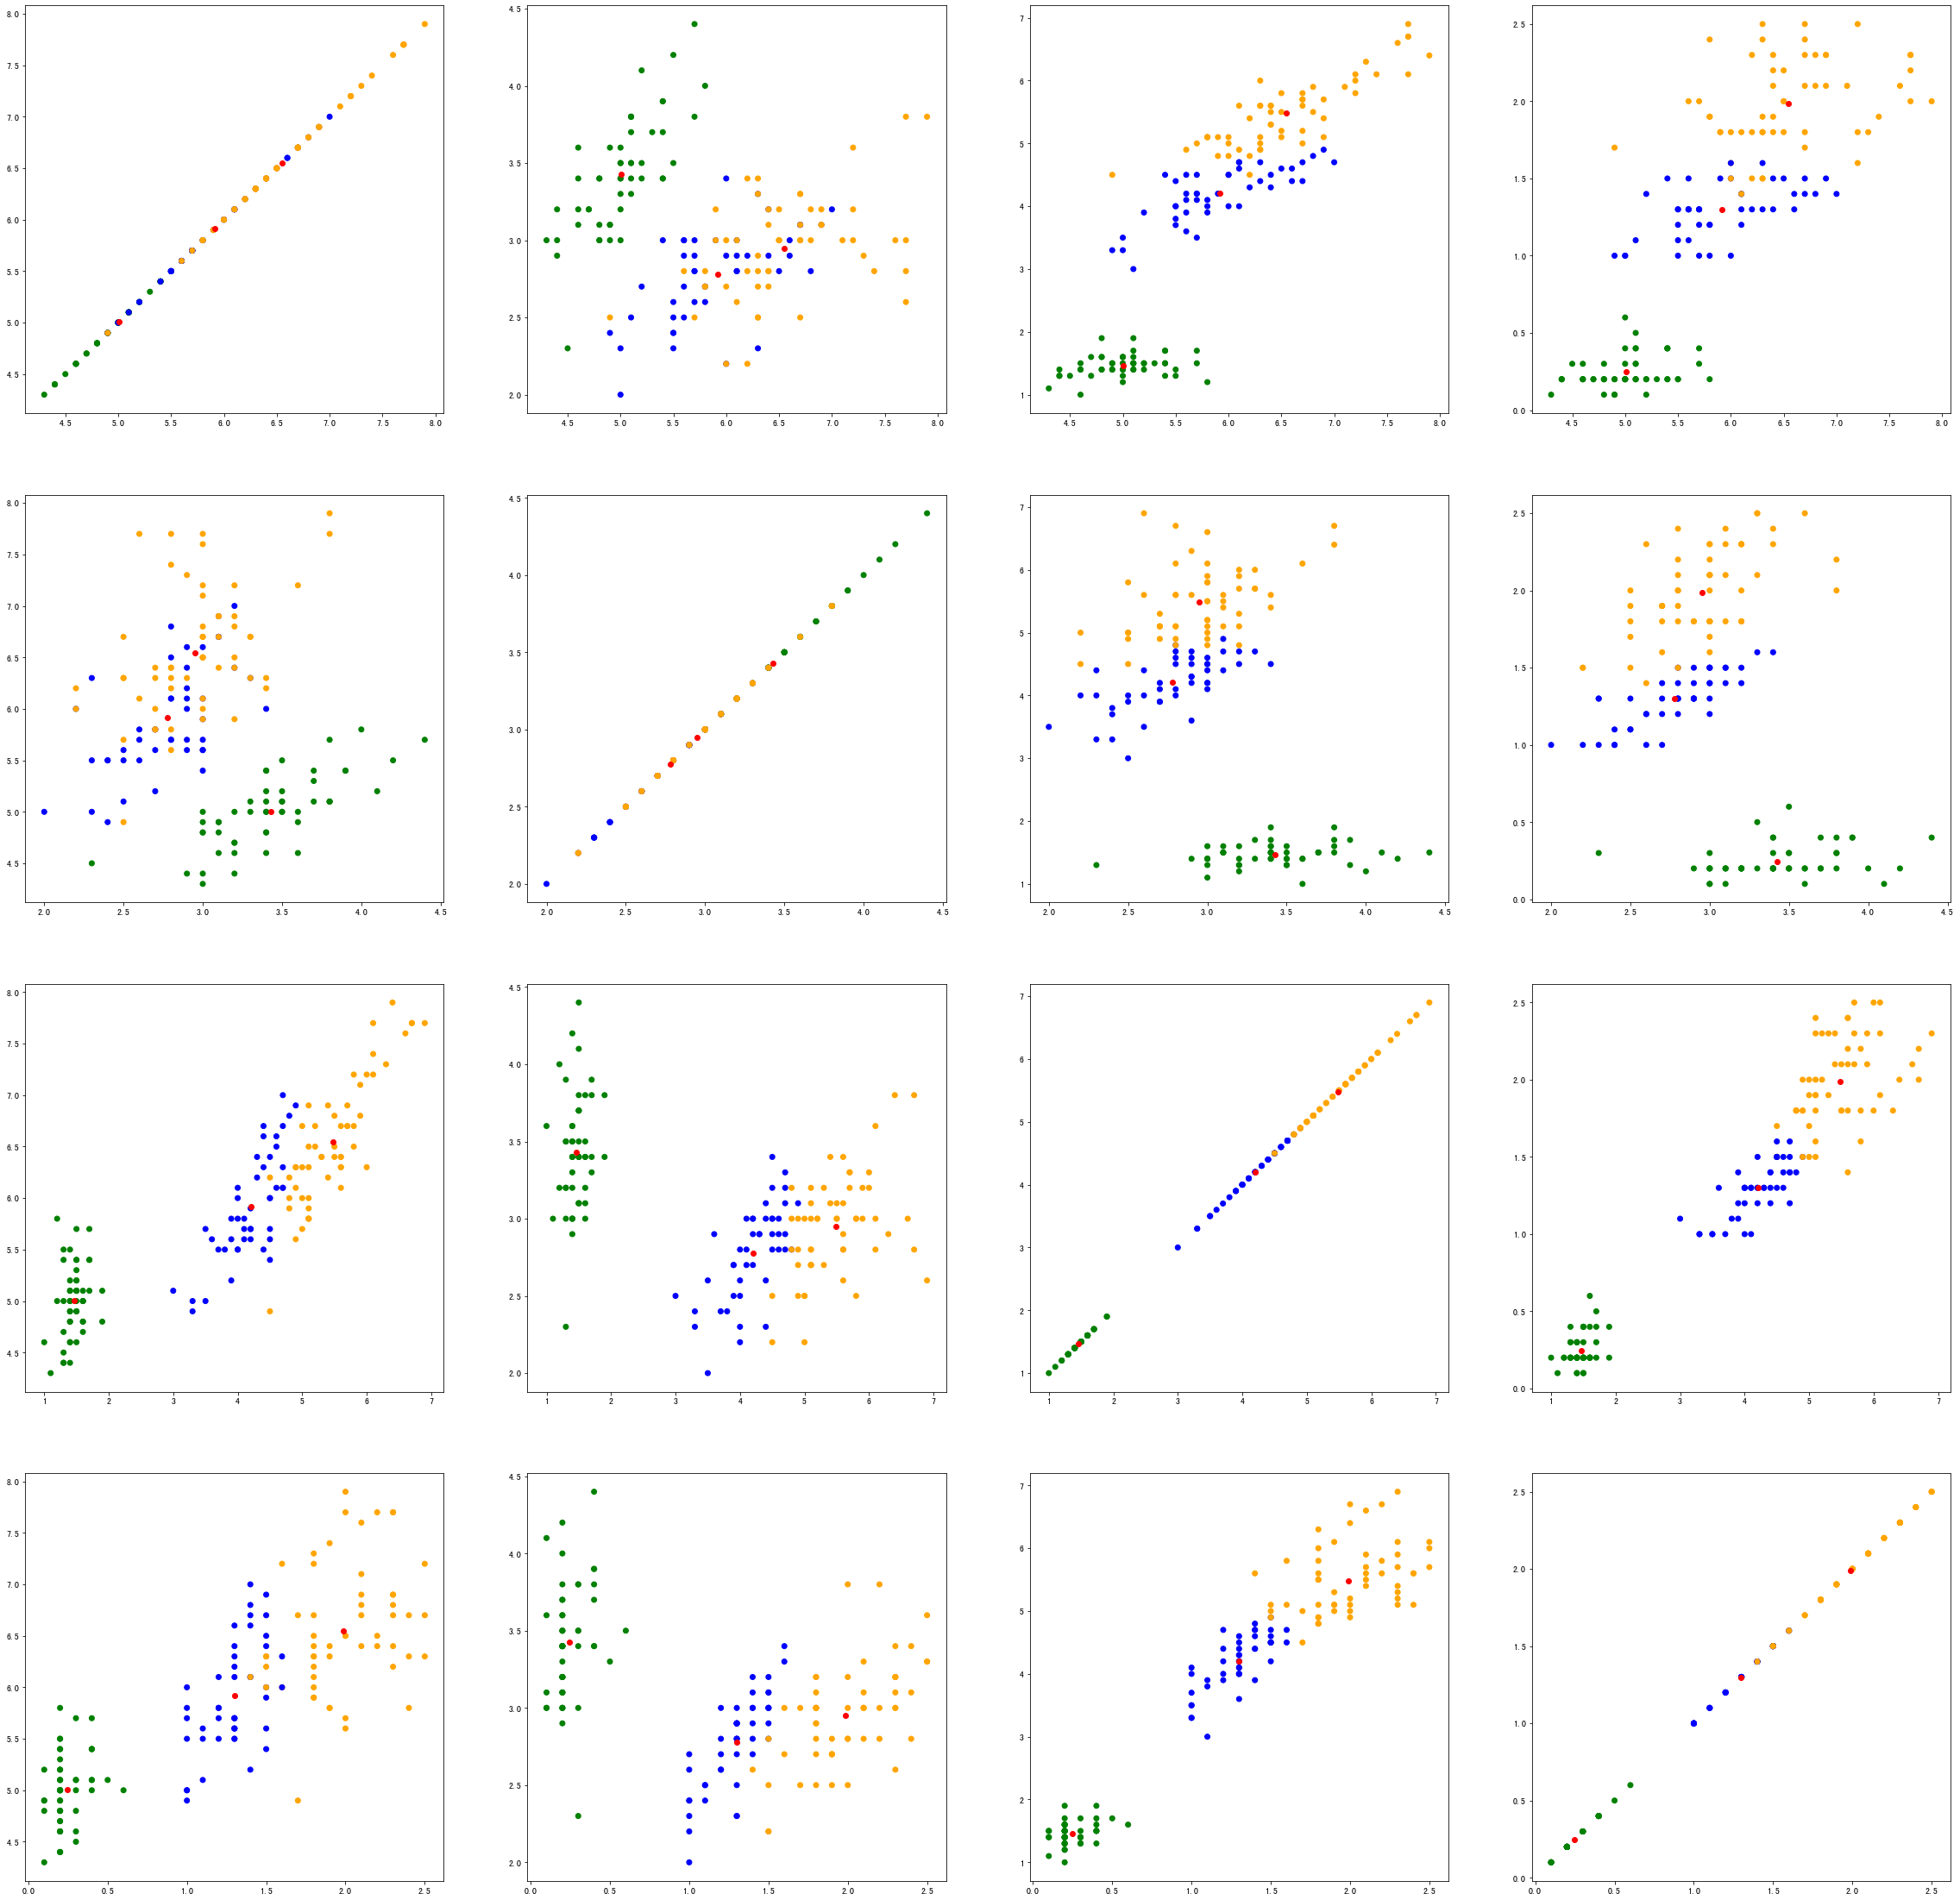

In [224]:
##TODO##
fig, axes = plt.subplots(4, 4, figsize=(40,40));
n = X.shape[1];
index = 0;

color_map = ['orange', 'green', 'blue'];
colors = [color_map[i] for i in gmm.predict(X)];

for i in range(n):
    for j in range(0, n):
        axes[index//4, index%4].scatter(X[:, i], X[:, j], c=colors);
        axes[index//4, index%4].scatter(gmm.means_[:,i], gmm.means_[:,j], c="red");
        index += 1;